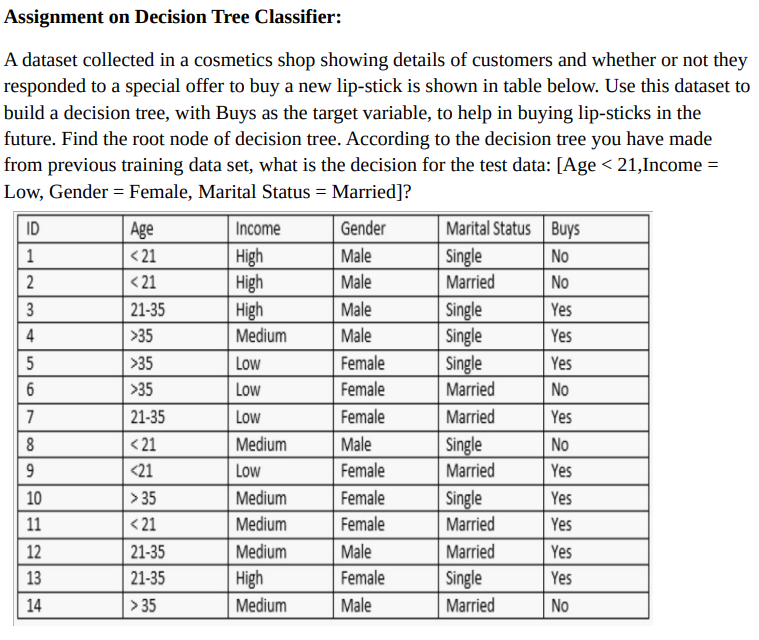

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [18]:
data = {
    'age': ['<21', '<21', '21-35', '>35', '>35', '>35', '21-35', '<21', '<21', '>35', '<21', '21-35', '21-35', '>35'], 
    'income':['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
    'gender':['male','male','male','male','female','female','female','male','female','female','female','male','female','male'],
    'marital_status':['single', 'married', 'single', 'single', 'single', 'married', 'married', 'single', 'married','single','married','married','single','married'],
    'buys':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
} 

df = pd.DataFrame.from_dict(data)
df

,age,income,gender,marital_status,buys
0,<21,high,male,single,no
1,<21,high,male,married,no
2,21-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,married,no
6,21-35,low,female,married,yes
7,<21,medium,male,single,no
8,<21,low,female,married,yes
9,>35,medium,female,single,yes


In [19]:
df.describe()

,age,income,gender,marital_status,buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,>35,medium,male,single,yes
freq,5,6,7,7,9


In [20]:
def encode_data(df, target):
    cat_cols = []
    for column in df.columns:
        if(df[column].dtype == 'object' and column != target):
            if len(df[column].unique()) > 2:
                cat_cols.append(column)
                features = df[column].value_counts().index.to_list()
                
                for key in features:
                    col_name = f"{column}_{key}"
                    df[col_name] = 0
                    df.loc[df[column] == key, col_name] = 1
    df.drop(columns=cat_cols, inplace=True)
    return df

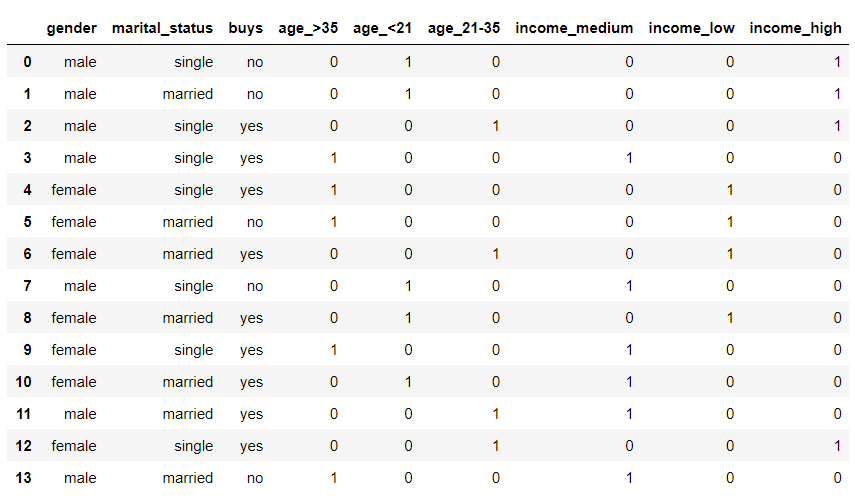

In [21]:
def preprocess_data(df):
    df_encoded = encode_data(df, 'buys')
    for column in df_encoded:
        if df_encoded[column].dtype == "object" and len(df_encoded[column].unique()) == 2:
            unique_values = df[column].unique()
            df_encoded[column] = df_encoded[column].map({
                f"{unique_values[0]}": 0,
                f"{unique_values[1]}": 1
            })
            print(f"For column {column}, class {unique_values[0]} maps to 0 and class {unique_values[1]} maps to 1")
    return df_encoded

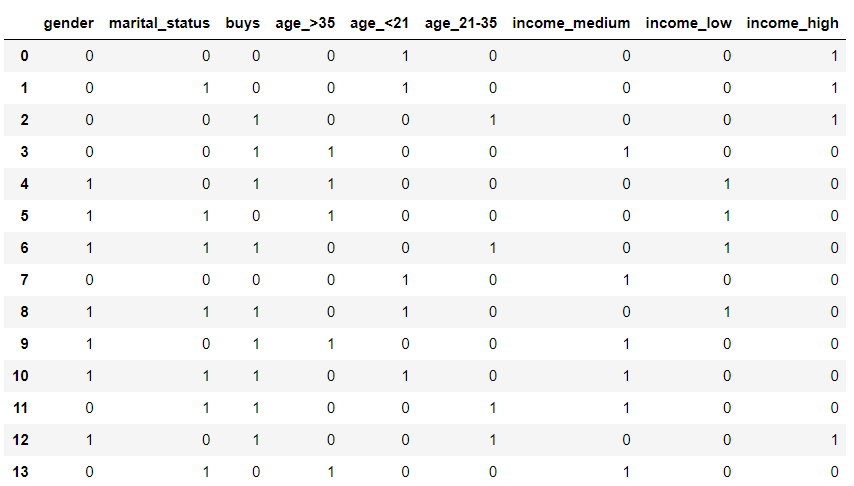

In [22]:
df_encoded = preprocess_data(df.copy())

For column gender, class male maps to 0 and class female maps to 1
For column marital_status, class single maps to 0 and class married maps to 1
For column buys, class no maps to 0 and class yes maps to 1


In [23]:
df_encoded

,gender,marital_status,buys,age_>35,age_<21,age_21-35,income_medium,income_low,income_high
0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,1,0,0,1
3,0,0,1,1,0,0,1,0,0
4,1,0,1,1,0,0,0,1,0
5,1,1,0,1,0,0,0,1,0
6,1,1,1,0,0,1,0,1,0
7,0,0,0,0,1,0,1,0,0
8,1,1,1,0,1,0,0,1,0
9,1,0,1,1,0,0,1,0,0


In [26]:
X = df_encoded.drop(columns=['buys']).to_numpy()
y = df_encoded[['buys']].to_numpy()
y

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [27]:
classifier = DecisionTreeClassifier()
classifier.fit(X, y)
y_pred = classifier.predict(X)
y_pred = ['yes' if y==1 else 'no' for y in y_pred]
print(y_pred)

['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
